# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

- The Smartcab doesn't move at all.
- Our Smartcab receives rewards as a numeric value during each iteration of simulation. This reward value can be negative or positive.
- For the traffic light our Smartcab is facing, if it's red light (and our cab keeps still), we get a positive reward value, since we should wait at the crossroad. If it's green light (and our cab keeps still), we get a negative reward value, since we don't move when we should do so.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- `agent.py`:
    - learning: If set to be True, then the agent will use Q-Learning.
    - alpha: The learning rate for the agent, can be set bewteen 0 and 1.
    - enforce_deadline: If set to be True, then the deadline_metric is enforece for the agent. 


- `environment.py`: The class function `'act()'` will be called when agent performs an action, and perform the action if it is legal. Moreover, agent will receive a reward based on the traffic law.


- `simulator.py`: The `'render_text()'` function is the non-GUI render display of simulation, i.e, it displays texts to your terminal to show how the simulation goes. The `'render()'` function is the GUI render display, i.e, it displays graphics to show how the simulation goes.


- `planner.py`: The `'next_waypoint()'` function considers the East-West direction first, then the `'North-South'` direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


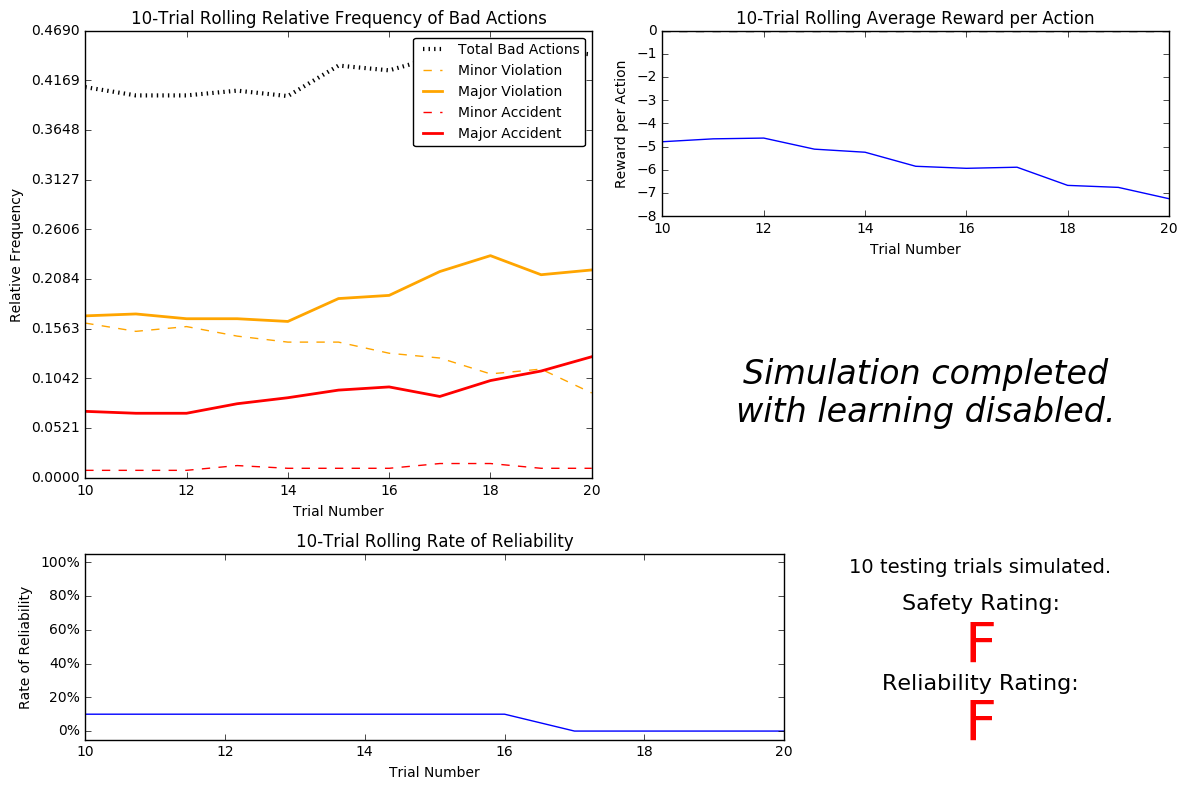

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- The drivining agent seems to make bad decisions in 40% of all the time. About 14% - 25% bad decisions cause accidents.
- The agent is driving purely randomly, and each time, it just takes a random action from `'None'`, `'Left'`, `'Right'` and `'Forward'`. It knows nothing about the `waypoint`, and therefore doesn't know if an action will make it closer or further to its destination. Each time the probability our cab makes a **correct action** is about 25%. Therefore, reliability rate is slightly less than this value, which is not completely no-sence.

- There is no doubt that our randomly driving agent is doing really badly, so that it continuesly receives heavy (negative) rewards all the time.
- As the number of trials increases, it seems that, unfortunately, our agent is doing worse and worse. The average reward per action it receives goes from -5 to -7, meaning it is behaving more and more dangerously. On the other hand, the reliability also decreases from 10% to almost 0%, meaning it is almost very impossible for it to reach destination in time.

To summarize, it is obvious that this `Smartcab` cannot be considered safe and reliable and it is no wonder that it receives two **F** scores for its safety and reliability.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

- Learning **Safety**: I choose to use the following features -
    - `light`: This is the most important feature about safety. Almost in any situations, traffic violations or accidents happen if the cab choose to move against a red light. The only exception, is that when the cab turns right on a red light, and there is no other car on the left side trying to move forward, which is completely safe.
    - `inputs[oncoming]`: This is also important. Suppose our agent is moving forward on a green light, then there is an oncoming car that is going to turn left. This will cause a serious accident.
    - `inputs[left]`: As mentioned to justify '`light`', the agent had better know cars on the left side. Because, if our cab tries to turn right on a red light, and suddenly a car on the left side tries to move forward, then cursh can still occur.


- Learning **Efficiency**: I choose to the use following feature -
    - `waypoint`: It is clear that the `waypoint` attribute always tell the the next best action, for the cab to reach the destination as soon as possible. Therefore, in order to be efficient and not to hit the deadline, the cab should always consider the `waypoint` it is sugggested.

**Therefore, the features I don't use are -**
- `dead_line`: Normally, the `dead_line` will directly reflect the remaining time for a cab to reach its destination, and a cab should always avoiding using up its remaining time. But in my opinion, it doesn't make much sense to learn from this `numeric` value. For example, let's say, if the remaining time is 10 steps or 5 steps, what is the most efficient approch for the cab to reach its destination? Well, even if there are only 2 remaining steps, we are still not allowed to jump from our current position to our destination via a straight line in Euclidean space, instead, we still need to follow this Grid Network System. And `Waypoint` is always the best suggestion we can get in that situation, regardless of the remaining time.


- inputs[right]: According to the US traffic rule, our cab actually needs not care about cars on the right side. If it's red light, and our agent of course cannot move forward or turn left, and turning right means our cab will never crush with a car on the right side (no matter whether that car is moving forward, turning left or right). On the other hand, if it's green light, our cab is of course safe to move in any direction. Therefore, ignoring traffic on the right side is completely safe.

Also by not including these two features, we can keep our state space as small as possible.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Following question 4, I use 4 features: `light`, `waypoint`, `input[oncoming]`, `input[left]` to construct the state space.

- Possible values of `light`: **red**, **green**.

- Possible values of `waypoint`: **forward**, **left**, **right**.

- Possible values of `input[oncoming]`: **None**, **forward**, **left**, **right**.

- Possible values of `input[left]`: **None**, **forward**, **left**, **right**.

Therefore there are 2 x 3 x 4 x 4 = 96 possible states.

Suppose all the states are independent with each other, then Monte Carlo simulation tells that when training for 750 steps, we have about 95.9% probability to visit all the 96 possible states. 750 steps doesn't seem too horrible, and also it is easily achievable when we use the epsilon-decaying function.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

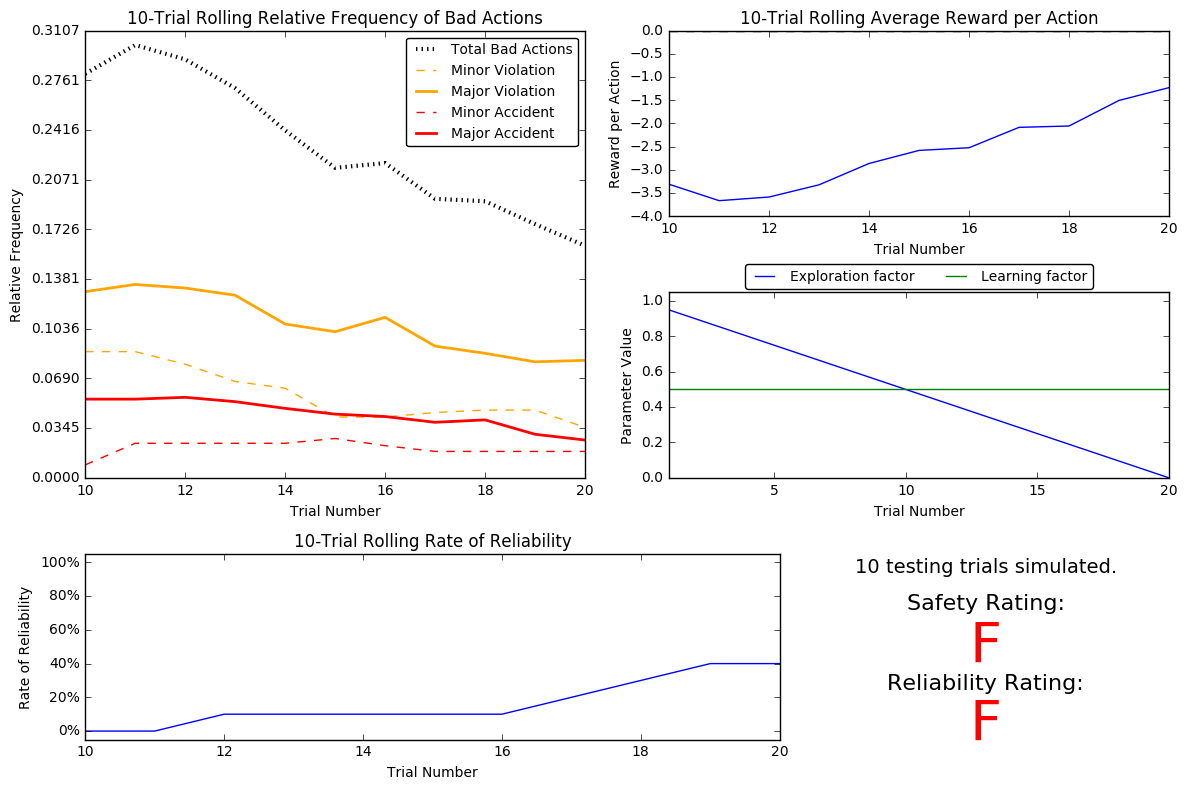

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

- The most obvious observation is that, the deafult Q-Learning agent **seems** to perform as bad as the basic driving agent (still receives **F** score for safety and **F** score for reliability).


- We are using a linear decaying *epsilon*, and at each trial the *epsilon* will decrease for 0.05. If the starting *epsilon* is 1 then after 20 trials it will decay to 0, which is consistent with the trial number (20) we got, for the training process to finish.


- According to the parameter panel, the decaying function works as planned, so that it makes the *epsilon* linearly decreased from 1 to 0, when the trial number goes from 0 to 20.


- A good news for our Q-Learning algorithm is that, when the number of trials increased, frequency of total bad actions drops from about 27% to 17%, which is nicer than the basic agent. Moreover, any sub-type of bad actions also becomes less frequent: Major Violation drops from 13% to 10%; Minor Violation drops from 8% to 3%; Major Accident drops from 6% to 3%; Minor Accident stays at about 2%. On the other hand, average reward per action increased from -3.5 to about -1.2.


- As I said, unfortunately, the **safety** and **reliability** scores haven't improved even when we have started using Q-learning. However, our Q-learning agent is already start learning! The frequency of bad actions continuesly drop as the training goes on. Also, the realibity rate as well as the average reward per action continuesly increase when we train our agent more and more. **Simply, it is just because our agent is not trained enough, so that its improvement in its behaviour is not enough.** In here, we have 20 training trials, and suppose each trail contains about 20 steps, we can only have 400 training steps. But as mentioned ealier, 750 steps are necessary if we want the agent to almost (95.9% chance) visit every possible state. Clearly, 400 steps is far from enough.


To summerize, our Q-learning agent is starting to learn how to drive safely and efficently, but it is **not trained enough yet**.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

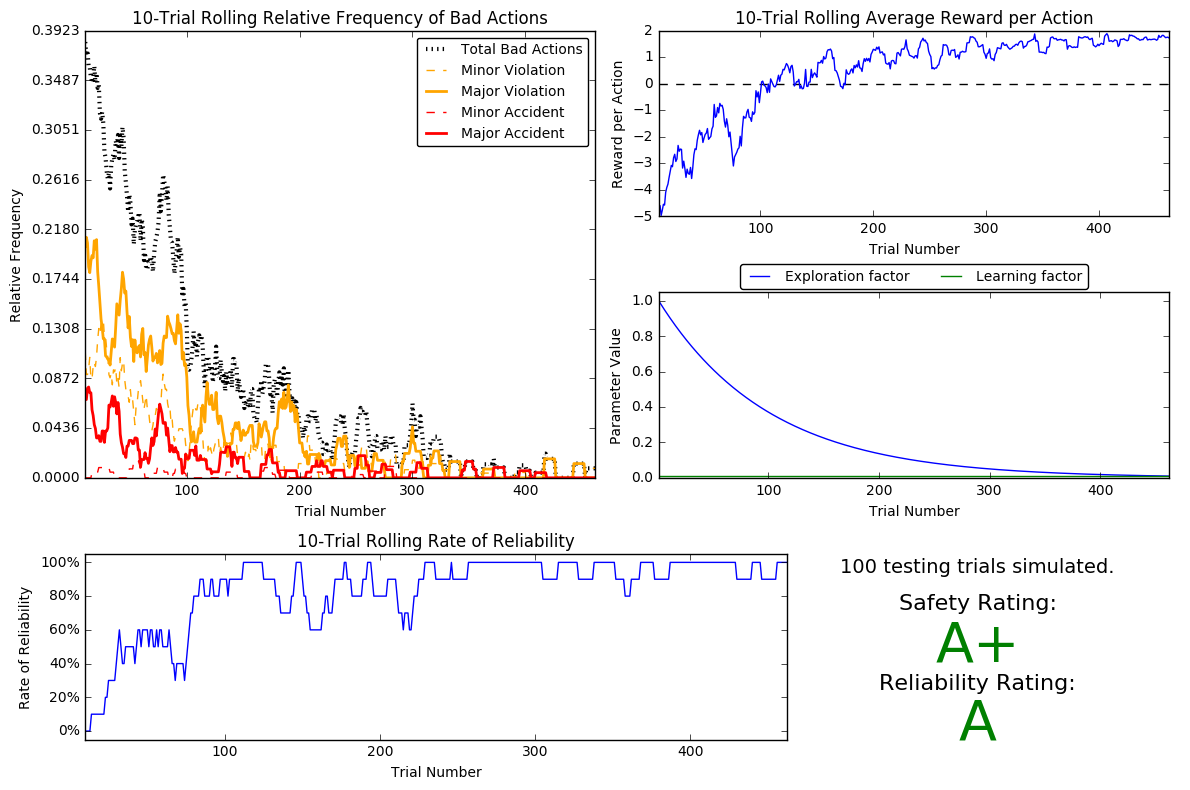

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

## **Answer:**

- The decaying function I used for epsilon is: $$ \epsilon = e^{-at} $$.


- Using the new decaying function, 462 training trials need to be done when the epsilon decayed to the tolerance.


- The `epsilon-tolerance` I used is 0.01. Since I want the the epsilon to decay much longer than before (when default tolerance of 0.05 is used), so that the agent can learn for more times.


- The `alpha` I used this time is 0.01 (also much less than the 0.5 used before), because this time I want the agent to not learn too much each time (instead learn little each time, but learn for more times).


- Our optimized Q-learner now makes fewer bad actions (frequency drops from 40% to 1%) which is much better than the default Q-learner (frequency drops from 27% to 17%). Moreover, any sub-type bad action, especially the Major Accident and Minor Violation, have decreased to almost 0% frequency at the end of training, which is also a great improvement than the default Q-learner. The reliability has reached almost 100% at the end of training, which is higher than before (40% for the default Q-learner).Finally the average reward per action has improved greatly (+2 at the end of training, and it is higher than -1.2 which is achieved by the default Q-learner at end of training).


- Most importantly, now our agent receives high safety (**A+**) and reliability (**A**) score.


- Overall, I would argue our optimized Q-learning algorithm has successfully trained our agent to drive the cab both safely and efficiently, and I am quite happy with the result.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

- The optimal policy -

    - When it is red light: If the waypoint tells the cab need to turn left or move forward, then the cab should stop. If The waypoint tells that the cab to turn right, then cab should only do so, if no car on the left side is moving forward.
    
    - When it is green light: If the waypoint tells the cab to move forward, then the cab should only do so, if no oncoming car turning left. If the waypoint tells the cab to turn left, then the cab should only do so if no oncoming car moving forward / no oncoming car turning right. If the waypoint tells the cab to turn right, then the cab should only do so if no oncoming car turning left. 


For the majority of the states, the cab has learned the optimal policy. In very few cases, the cab fails to do so.

I will use four example entries here, each entry is in the format of (`light`, `waypoint`, `inputs[oncoming]`, `inputs[left]`).

**Entry 1**
 - ('green', 'forward', None, None)
     - forward : 1.81
     - right : 0.09
     - None : -1.17
     - left : 0.27

This entry is a really simple situation, when it is green light, the waypoint tells the cab to move forward, and there is no car in the oncoming direction or left side. The `'forward'` action has the highest score, which is the optimal policy: just move forward and cross the road, and the cab successfully learns that.

**Entry 2**

- ('green', 'right', 'right', 'left')
    - forward : 0.00
    - right : 0.18
    - None : 0.00
    - left : 0.02

This entry means the situation, when it is green light, the waypoint tells the cab to turn right, and the cab finds that an oncoming car is turning right, also a car on the left side is turning left. Again the oncoming car and the car on the left side is not going to crush with our cab. So the optimal policy is that the cab follows the waypoint and turn right, which is what it learns.

**Entry 3**

- ('red', 'right', 'right', 'forward')
    - forward : -0.79
    - right : 0.00
    - None : 0.08
    - left : 0.00

This entry means the situation, when it is red light, the waypoint tells the cab to turn right, and the cab finds that an oncoming car is turning right, and a car on the left side is moving foward. Although it is no against the traffic rule to turn right under a red light, but that car on the left side moving forward is going to cause troubles. Therefore the optimal policy is the cab still wait at the crossroad (even if it will receives a small negative reward), which is better than causing a collision (to receive even more negative reward). So the cab learns the optimal action in this situation.


**Entry 4**

- ('red', 'left', 'right', 'left')
 - forward : -0.19
 - right : 0.20
 - None : 0.00
 - left : 0.00

This is somthing weird to be honest. The situation is that, it is red light, the waypoint tells the cab to turn left, and the cab finds that an oncoming car is turning right, and a car on the left side is turning left. We can immediately realize that in this situation (red light + suggested turning left), the best thing to do is to stop at the corssroad, which is the optimal policy. But according to this entry, the cab learns that it should turn right, which obviously pushing the cab more distant to its goal (since it is 180 degree change to the suggested direction in the grid network system). I would argue that, the cause of this could be that, the cab doesn't do much explorations into this states in the early training process. Possibily, in the early training process, **when exploration is dominating**, the cab randomly picks up '`turning right`' action in this situation, and gets a positive reward (in fact, this will cause neither accidents nor violations, considering the oncoming and left traffic in this situation). Then when our epsilon starts to decrease and becomes **quite small and now exploitation is dominating**, the cab visit this state again, **but this time it wants to look into the Q table instead of making a random choice!** The outcome, is that it starts to choose the action of '`turn right`' without even looking at the '`None`' (stop) option since then. Therefore, I am quite confident to say, that is the reason why the '`None`' option is never visited, and therefore stays at 0.00.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

- The smartcab factor: That could be the inability to sensing **enough** nearby traffic to assess the future reward. This traffic system is not stationary, and the bad news is the all the other cars are moving in an unpreditable way. In each step, every other car can be moving into a different position. Therefore, knowing the traffic 1 step ahead doesn't seem enough in this situation, at least 2 steps head is neccssary. For example, we need to know 'If the cab moves forward and reaches the next crossroad, what is oncoming traffic and the traffic on the left and right side at that crossroad?'


- The environmental factor: I would suspect it is the position of the starting point and destination. In each trial, the smartcab starts at a different location, and it tries to reach a different destination. If I understand correctly, in each trial, if we use future rewards, then the learner will overfit to the starting point and that destination in that **particular** trial. Doesn't seem a good thing, if you need to have an smart agent for unknown starting point and destination each time.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.